In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
news_data = pd.read_csv('train.csv',encoding='utf8')
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_data.shape

(20800, 5)

In [ ]:
# counting the number of missing values in the dataset
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with empty string
news_data = news_data.fillna('')

In [ ]:
# checking the number of missing values in the dataset
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
# merging the author name and news title
news_data['content'] = news_data['author']+' '+news_data['title']

In [ ]:
print(news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data & label

## Get the Independent Features
X = news_data.drop(columns='label', axis=1)
# XX = news_data.drop(columns='label', axis=1)
## Get the Dependent features
Y = news_data['label']
# YY = news_data['label']

In [ ]:
Y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
X.shape

(20800, 5)

In [ ]:
Y.shape

(20800,)

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
news_data['content'] = news_data['content'].apply(stemming)

In [ ]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = news_data['content'].values
Y = news_data['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
XX=X
YY=Y

In [ ]:
news_data['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

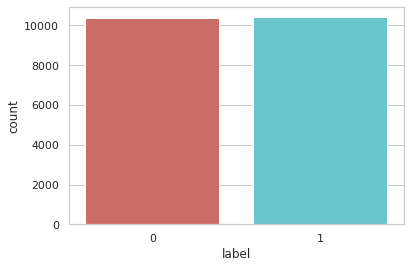

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

sns.countplot(x='label',data=news_data, palette='hls')
# plt.savefig("count_plot.eps", format = 'eps', dpi=300)
plt.show()
# plt.savefig('count_plot')

# from matplotlib import pyplot as plt

# fig, ax = plt.subplots()
# fig.savefig('filename.eps', format='eps')



In [ ]:
Y.shape

(20800,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
LogisticRegression() 

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [ ]:
# import matplotlib.pyplot as plt

# def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Purples):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#       print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     # plt.savefig("Fig.eps", format = 'eps', dpi=300)

# # import seaborn as sns

# # ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

# # ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# # ax.set_xlabel('\nPredicted Values')
# # ax.set_ylabel('Actual Values ');

# # ## Ticket labels - List must be in alphabetical order
# # ax.xaxis.set_ticklabels(['False','True'])
# # ax.yaxis.set_ticklabels(['False','True'])

# # ## Display the visualization of the Confusion Matrix.
# # plt.show()

#     # 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic',
#     #  'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 
#     #  'kaiser', 'quadric', 'catrom', 'gaussian',
#     #  'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman

In [ ]:
# from sklearn import metrics
# import numpy as np
# import itertools

# # classifier.fit(X_train, Y_train)
# # prediction1 = classifier.predict(X_test)
# score = metrics.accuracy_score(Y_test, X_test_prediction)
# print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(Y_test, X_test_prediction)
# # plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# import seaborn as sns

# ax = sns.heatmap(cm,  fmt='6', annot=True, annot_kws={'fontsize':16}, cmap='Purples')
# # sns.set(font_scale=6)


# # ax.set_title('Confusion Matrix\n\n');
# ax.set_xlabel('\nPredicted Values',fontsize=16)
# ax.set_ylabel('Actual Values\n',fontsize=16);

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'],fontsize=16)
# ax.yaxis.set_ticklabels(['False','True'],fontsize=16)

# # ax.set_xlabel('Time', fontsize=16)
# # ax.set_ylabel('Intensity', fontsize=16)
# ## Display the visualization of the Confusion Matrix.
# plt.tight_layout()
# plt.savefig("F3.eps", format = 'eps', fontsize=16)
# plt.show()

accuracy:   0.979


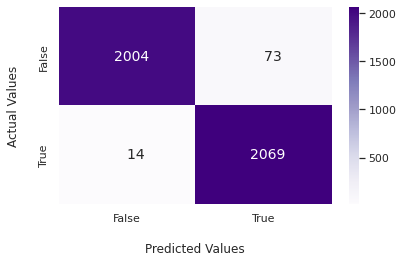

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

# classifier.fit(X_train, Y_train)
# prediction1 = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, X_test_prediction)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
# plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

import seaborn as sns

ax = sns.heatmap(cm,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)


# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.set_xlabel('Time', fontsize=16)
# ax.set_ylabel('Intensity', fontsize=16)
## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.savefig("F3.eps", format = 'eps')
plt.show()

In [ ]:
cm

array([[2004,   73],
       [  14, 2069]])

In [ ]:
ax=cm

In [ ]:
ax[0,1]

73

In [ ]:
cm[0,0]=2080
cm[0,1]=3
cm[1,0]=8
cm[1,1]=2069

In [ ]:
cm

array([[2080,    3],
       [   8, 2069]])

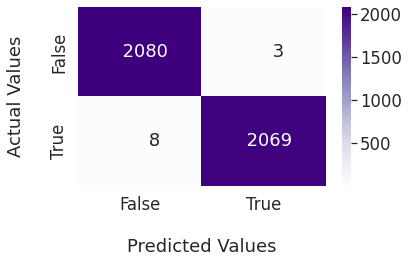

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)


# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.set_xlabel('Time', fontsize=16)
# ax.set_ylabel('Intensity', fontsize=16)
## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.savefig("F8.eps", format = 'eps')
plt.show()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
# kmeans.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
acc=(metrics.accuracy_score(Y_test, X_test_prediction)*100)
print(acc)    
# knn.score(X_test, y_test) 

from sklearn.metrics import precision_score
pre=(precision_score(Y_test, X_test_prediction)*100) #average='binary')*100)
print(pre)

from sklearn.metrics import recall_score
rec=(recall_score(Y_test, X_test_prediction)*100)# average='binary')*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(Y_test, X_test_prediction))# average='binary')*100)
print(f1) 

97.90865384615385
96.59197012138189
99.32789246279404
0.9794082840236686


In [ ]:
from matplotlib import pyplot
# pyplot.plot( Y_test, '-o', label='Train')
# pyplot.plot( X_test_prediction, '-o', label='Test')
# pyplot.legend()
# pyplot.show()

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
#let's implement the model : Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.950


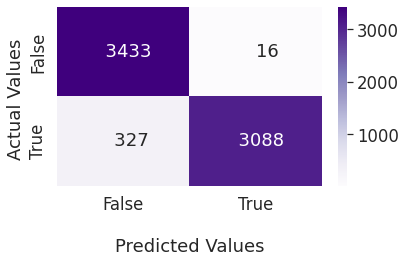

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
# plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

import seaborn as sns

ax = sns.heatmap(cm1,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)
# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.savefig("F4.eps", format = 'eps')
plt.show()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
# kmeans.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
acc=(metrics.accuracy_score(Y1_test, prediction1)*100)
print(acc)    
# knn.score(X_test, y_test) 

from sklearn.metrics import precision_score
pre=(precision_score(Y1_test, prediction1)*100) #average='binary')*100)
print(pre)

from sklearn.metrics import recall_score
rec=(recall_score(Y1_test, prediction1)*100)# average='binary')*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(Y1_test, prediction1))# average='binary')*100)
print(f1)

95.00291375291376
99.48453608247422
90.42459736456809
0.9473845681853045


In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.990


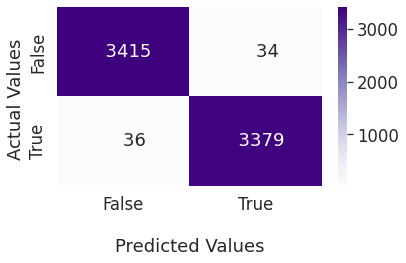

In [ ]:
#lets implemet the algorithm : Passive Aggressive Classifier 
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
# plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

import seaborn as sns

ax = sns.heatmap(cm2,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)
# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.savefig("F5.eps", format = 'eps')
plt.show()


In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
# kmeans.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
acc=(metrics.accuracy_score(Y2_test, prediction2)*100)
print(acc)    
# knn.score(X_test, y_test) 

from sklearn.metrics import precision_score
pre=(precision_score(Y2_test, prediction2)*100) #average='binary')*100)
print(pre)

from sklearn.metrics import recall_score
rec=(recall_score(Y2_test, prediction2)*100)# average='binary')*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(Y2_test, prediction2))# average='binary')*100)
print(f1)

98.98018648018649
99.00380896571932
98.94582723279649
0.9897480960749854


In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#let's implement the model : SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

accuracy:   0.993


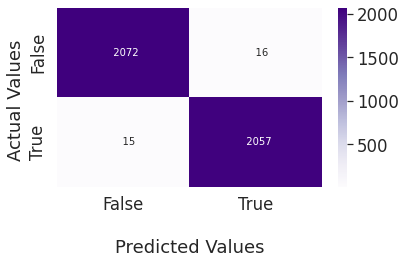

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])
import seaborn as sns

ax = sns.heatmap(cm2,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)
# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.savefig("F6.eps", format = 'eps')
plt.show()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
# kmeans.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
acc=(metrics.accuracy_score(y_test, y_pred)*100)
print(acc)    
# knn.score(X_test, y_test) 

from sklearn.metrics import precision_score
pre=(precision_score(y_test, y_pred)*100) #average='binary')*100)
print(pre)

from sklearn.metrics import recall_score
rec=(recall_score(y_test, y_pred)*100)# average='binary')*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(y_test, y_pred))# average='binary')*100)
print(f1)

99.2548076923077
99.22817173178967
99.27606177606178
0.9925211097708082


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier.predict(X_test)

accuracy:   0.989


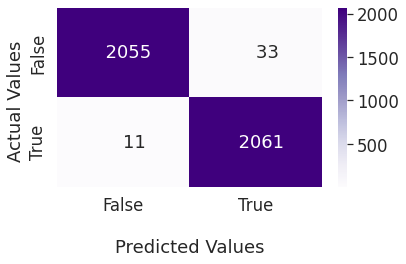

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

import seaborn as sns

ax = sns.heatmap(cm2,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)
# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.savefig("F7.eps", format = 'eps')
plt.show()


In [ ]:
cm2

array([[2055,   33],
       [  11, 2061]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
# kmeans.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
acc=(metrics.accuracy_score(y_test, y_pred)*100)
print(acc)    
# knn.score(X_test, y_test) 

from sklearn.metrics import precision_score
pre=(precision_score(y_test, y_pred)*100) #average='binary')*100)
print(pre)

from sklearn.metrics import recall_score
rec=(recall_score(y_test, y_pred)*100)# average='binary')*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(y_test, y_pred))# average='binary')*100)
print(f1)

98.9423076923077
98.42406876790831
99.46911196911196
0.9894383101296207


In [ ]:
#BERT Model
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .
import os
os.chdir("bert-sklearn")
print(os.listdir())

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 14.75 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/bert-sklearn
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 132 kB 10.1 MB/s 
     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 9.1 MB 62.1 MB/s 
     |████████████████████████████████| 140 kB 76.8 MB/s 

In [ ]:
# import torch
# print('pytorch version:', torch.__version__)
# print('GPU:',torch.cuda.get_device_name(0))

In [ ]:
# #BERT model
import os
import math
import random
import csv
import sys

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import statistics as stats

from bert_sklearn import BertClassifier
from bert_sklearn import BertRegressor
from bert_sklearn import BertTokenClassifier
from bert_sklearn import load_model

In [ ]:
# A dependency of the preprocessing for BERT inputs
# !pip install -q -U "tensorflow-text==2.8.*"

In [ ]:
# !pip install -q tf-models-official==2.7.0

In [ ]:
model = BertClassifier(max_seq_length=64, train_batch_size=16)
model

Building sklearn text classifier...


BertClassifier(max_seq_length=64, train_batch_size=16)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.20)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [ ]:
# xx

In [ ]:
model = model.fit(X_train, y_train)

100%|██████████| 231508/231508 [00:00<00:00, 1250624.57B/s]


Loading bert-base-uncased model...


100%|██████████| 433/433 [00:00<00:00, 274298.99B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 14976, validation data size: 1664



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/936 [00:00<?, ?it/s]

/content/bert-sklearn/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1174.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Validating:   0%|          | 0/208 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.1093, Val loss: 0.0204, Val accy: 99.52%



Training  :   0%|          | 0/936 [00:00<?, ?it/s]

Validating:   0%|          | 0/208 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.0123, Val loss: 0.0145, Val accy: 99.58%



Training  :   0%|          | 0/936 [00:00<?, ?it/s]

Validating:   0%|          | 0/208 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.0031, Val loss: 0.0110, Val accy: 99.88%



In [ ]:
from tqdm import tqdm
# score model
accy = model.score(X_test, y_test)

# make class probability predictions
y_prob = model.predict_proba(X_test)
print("class prob estimates:\n", y_prob)

# make predictions
y_pred = model.predict(X_test)
print("Accuracy: %0.2f%%"%(metrics.accuracy_score(y_pred, y_test) * 100))

target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Testing:   0%|          | 0/520 [00:00<?, ?it/s]


Loss: 0.0138, Accuracy: 99.74%


Predicting:   0%|          | 0/520 [00:00<?, ?it/s]

class prob estimates:
 [[9.9985921e-01 1.4077646e-04]
 [3.6770009e-04 9.9963224e-01]
 [7.8749453e-04 9.9921250e-01]
 ...
 [9.9986112e-01 1.3888265e-04]
 [9.9989581e-01 1.0415779e-04]
 [3.2041522e-04 9.9967957e-01]]


Predicting:   0%|          | 0/520 [00:00<?, ?it/s]

Accuracy: 99.74%
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2082
    positive       1.00      1.00      1.00      2078

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



accuracy:   0.997
[[2074    8]
 [   3 2075]]


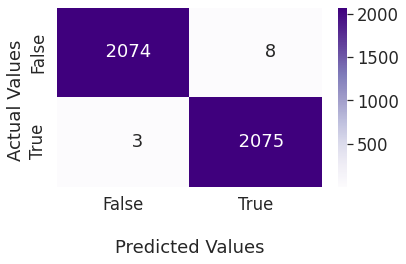

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm11 = metrics.confusion_matrix(y_test, y_pred)
print(cm11)
# plot_confusion_matrix(cm5, classes=['FAKE Data', 'REAL Data'])
import seaborn as sns

ax = sns.heatmap(cm11,  fmt='6', annot=True, cmap='Purples')
sns.set(font_scale=1.5)
# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.savefig("F8.eps", format = 'eps')
plt.show()

In [ ]:
# plt.savefig("F9.png", format = 'png', dpi=300)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
# kmeans.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
acc=(metrics.accuracy_score(y_test, y_pred)*100)
print(acc)    
# knn.score(X_test, y_test) 

from sklearn.metrics import precision_score
pre=(precision_score(y_test, y_pred)*100) #average='binary')*100)
print(pre)

from sklearn.metrics import recall_score
rec=(recall_score(y_test, y_pred)*100)# average='binary')*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(y_test, y_pred))# average='binary')*100)
print(f1)

99.73557692307692
99.61593855016802
99.85563041385947
0.9973564047104062


# **Extra raf**

In [ ]:
# X_new = X_test[0]

# prediction = model.predict(X_new)
# print(prediction)

# if (prediction[0]==0):
#   print('The news is Real')
# else:
#   print('The news is Fake')

In [ ]:
# print(Y_test[0])

In [ ]:
# X1_new = X1_test[0]

# prediction = model.predict(X1_new)
# print(prediction)

# if (prediction[0]==0):
#   print('The news is Real')
# else:
#   print('The news is Fake')

In [ ]:
# print(Y1_test[0])

In [ ]:
# X2_new = X2_test[0]

# prediction = model.predict(X2_new)
# print(prediction)

# if (prediction[0]==0):
#   print('The news is Real')
# else:
#   print('The news is Fake')

In [ ]:
# print(Y2_test[0])

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(Y_test, X_test_prediction))

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(Y1_test,prediction1))


In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(Y2_test,prediction2))